# Import Library

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import zipfile
import os

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import learning_curve, cross_val_score
from xgboost import XGBRegressor


# Data Load

In [32]:
# Upload kaggle.json
from google.colab import files
files.upload()  # upload kaggle.json dari komputermu

# Pindahkan dan atur permission
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Install Kaggle CLI
!pip install -q kaggle

# Download dataset
!kaggle datasets download -d jayaantanaath/student-habits-vs-academic-performance

# Unzip
!unzip -q student-habits-vs-academic-performance.zip

Saving kaggle.json to kaggle (1).json
Dataset URL: https://www.kaggle.com/datasets/jayaantanaath/student-habits-vs-academic-performance
License(s): apache-2.0
student-habits-vs-academic-performance.zip: Skipping, found more recently modified local copy (use --force to force download)
replace student_habits_performance.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: no


In [33]:
df = pd.read_csv('/content/student_habits_performance.csv')
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


kode di atas dibuat untuk membaca file csv dari dataset

# Data Preparation & Data Preprocessing

### Melihat Informasi Data

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

melihat info dari dataset berupa nama fitur, jumlah fitur, jumlah data, dan tipe data

### Cek dan Mengatasi Data Hilang

In [35]:
# cek missing value
df.isnull().sum()

,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


terdapat missing value pada fitur parental_education_leve sebanyak 91 data

In [36]:
# Mengatasi missing value pada kolom parental_education_level
df['parental_education_level'].fillna(df['parental_education_level'].mode()[0], inplace=True)

# melihat kembali data yang sudah dibersihkan
print("Jumlah missing value setelah diatasi:")
print(df.isnull().sum())

Jumlah missing value setelah diatasi:
student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64


<ipython-input-36-4d6000293156>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['parental_education_level'].fillna(df['parental_education_level'].mode()[0], inplace=True)


Mengatasi missing value dengan mengisi nilai yang kosong dengan modus karena tipe datanya adalah object/kategorikal

### Cek dan Mengatasi Data Duplikat

In [37]:
# Melihat data duplicate
print("Jumlah data duplicate:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

Jumlah data duplicate: 0


tidak terdapat data duplikat sehingga tidak diperlukan penanganan apapun

### Menetapkan Kolom Target

In [38]:
# menetapkan kolom target
target = 'exam_score'
X = df.drop(columns=[target])
y = df[target]

# Identifikasi kolom numerik dan kategorikal
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

In [39]:
# Categorical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :',cat_col)
# Numerical columns
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :',num_col)

Categorical columns : ['student_id', 'gender', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation']
Numerical columns : ['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating', 'exam_score']


mengidentifikasi fitur yang termasuk pada tipe kategorik atau numerik kemudian melihat nama-nama fitur yang termasuk ke dalam tipe katergorik maupun numerik

### Cek Outliers

<ipython-input-40-7d7562c60493>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], ax=ax[i], palette="Set2")
<ipython-input-40-7d7562c60493>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], ax=ax[i], palette="Set2")
<ipython-input-40-7d7562c60493>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], ax=ax[i], palette="Set2")
<ipython-input-40-7d7562c60493>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fals

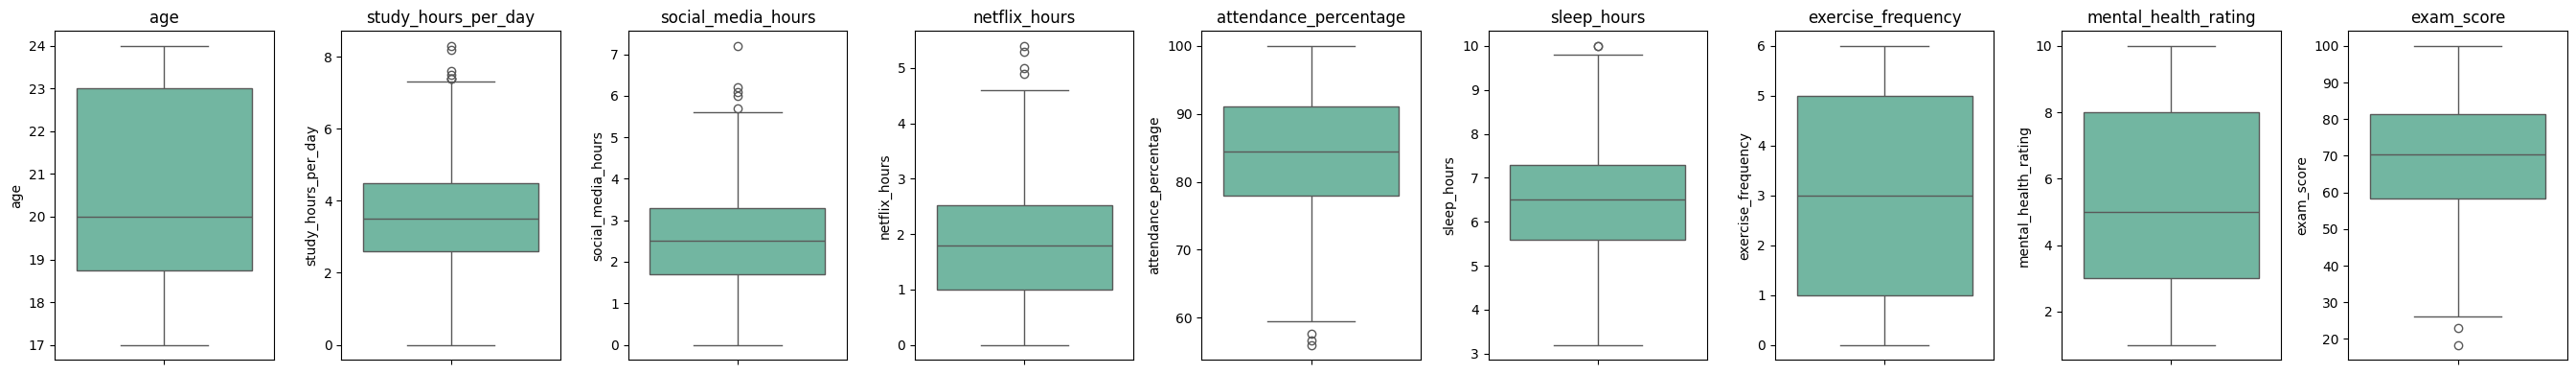

In [40]:
# cek outliers
num_cols = len(num_col)
fig, ax = plt.subplots(nrows=1, ncols=num_cols, figsize=(num_cols * 3, 4))

# Loop untuk membuat boxplot di setiap subplot
for i, col in enumerate(num_col):
    sns.boxplot(y=df[col], ax=ax[i], palette="Set2")
    ax[i].set_title(col)

plt.tight_layout()
plt.show()

Gambar boxplot di atas digunakan untuk melihat data outliers (data yang terletak di luar batas atas dan batas bawah) seperti yang terlihat pada plot di atas outliers terdeteksi pada fitur study_hours_per_day, social_media_hours, netflix_hours, attendance_percentage, sleep_hours, dan exam_score.

Data awal: 1000 baris
Setelah menghapus outlier: 977 baris


<ipython-input-41-119f81b7fad5>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_iqr[col], ax=ax[i], palette="Set2")
<ipython-input-41-119f81b7fad5>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_iqr[col], ax=ax[i], palette="Set2")
<ipython-input-41-119f81b7fad5>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_iqr[col], ax=ax[i], palette="Set2")
<ipython-input-41-119f81b7fad5>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and 

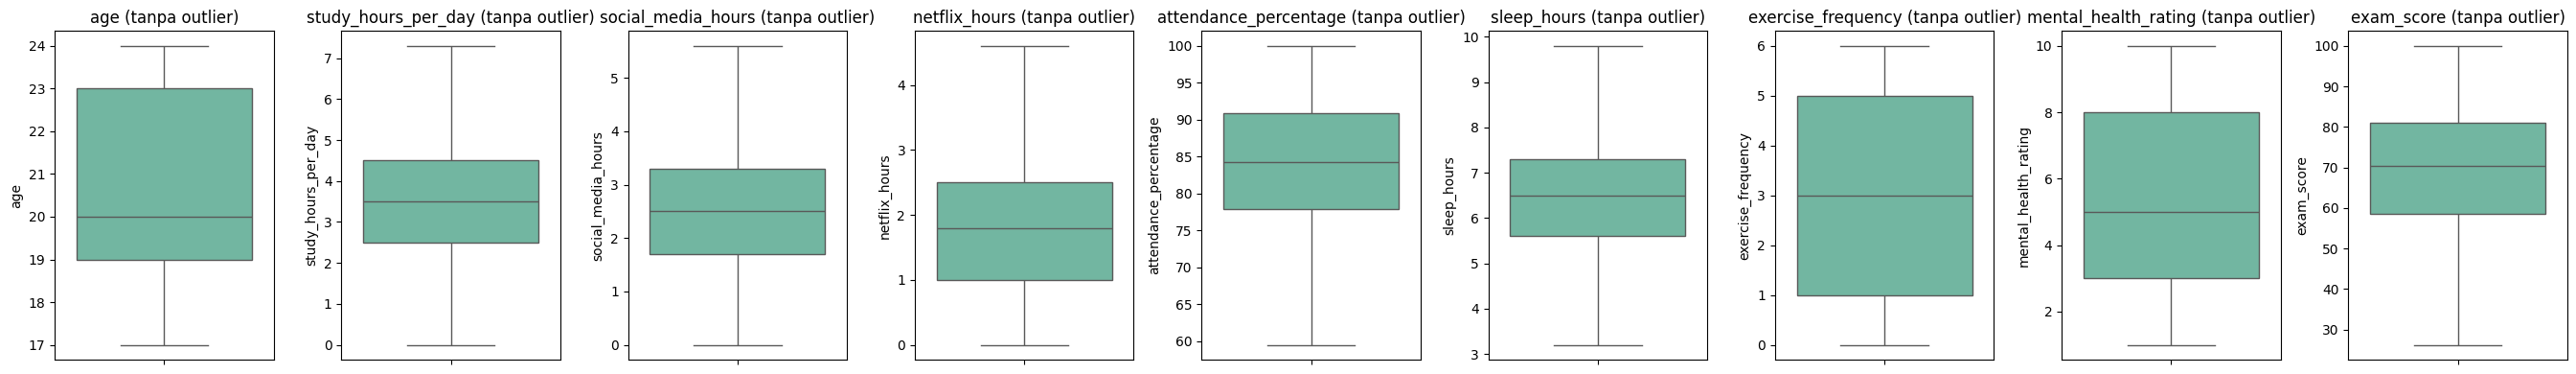

In [41]:
# Salin data untuk diproses
df_iqr = df.copy()

# Tangani outlier untuk setiap kolom numerik
for col in num_col:
    Q1 = df_iqr[col].quantile(0.25)
    Q3 = df_iqr[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter hanya data dalam rentang IQR (remove outliers)
    df_iqr = df_iqr[(df_iqr[col] >= lower_bound) & (df_iqr[col] <= upper_bound)]

print(f"Data awal: {df.shape[0]} baris")
print(f"Setelah menghapus outlier: {df_iqr.shape[0]} baris")

# Boxplot setelah menghilangkan outlier
num_cols = len(num_col)
fig, ax = plt.subplots(nrows=1, ncols=num_cols, figsize=(num_cols * 3, 4))

for i, col in enumerate(num_col):
    sns.boxplot(y=df_iqr[col], ax=ax[i], palette="Set2")
    ax[i].set_title(f"{col} (tanpa outlier)")

plt.tight_layout()
plt.show()

Data sudah bersih dari outliers menggunakan metode penghapusan data outliers dikarenakan outliers yang terdeteksi tidak ektrem. Data yang tersisa setelah penghapusan outliers adalah 977 baris dari jumlah semula adalah 1000 baris yang berarti ada 33 baris data yang dihapus.

### Splitting Data

In [42]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(800, 15), y_train=(800,)
Test set shape: X_test=(200, 15), y_test=(200,)


### Feature Scaling

In [43]:
# Pipeline untuk preprocessing data
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

* Scaling diperlukan agar semua fitur numerik berada pada skala yang sama, penting untuk pemodelan

* OneHotEncoder digunakan agar fitur kategorikal tidak dianggap ordinal oleh model.

* Pipeline membuat proses lebih efisien dan terstruktur, terutama saat dipakai berulang atau saat digunakan dalam model pipeline (training, evaluasi, deployment).

# Exploratory Data Analysis

### Scatter Plot – "Jam Belajar" vs "Nilai Ujian"

Text(0.5, 1.0, 'Hubungan Jam Belajar dan Nilai Ujian')

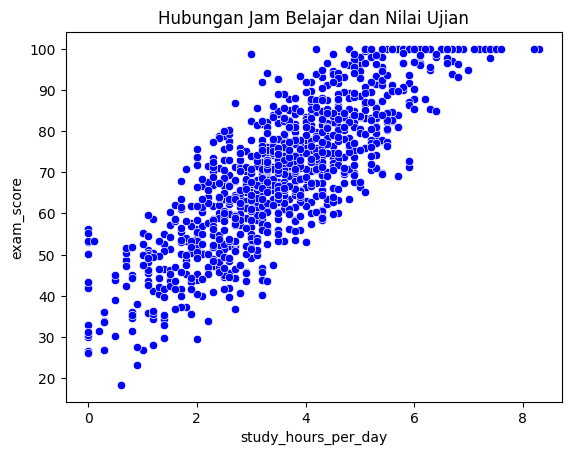

In [44]:
sns.scatterplot(data=df, x='study_hours_per_day', y='exam_score', color='blue')
plt.title("Hubungan Jam Belajar dan Nilai Ujian")

Scatter plot di atas menunjukkan hubungan korelasi yang kuat antara variabel durasi jam belajar dalam sehari dengan nilai ujian yang diperoleh.

### Scatter Plot – "Jam Tidur" vs "Nilai Ujian"

Text(0.5, 1.0, 'Hubungan Jam Tidur dan Nilai Ujian')

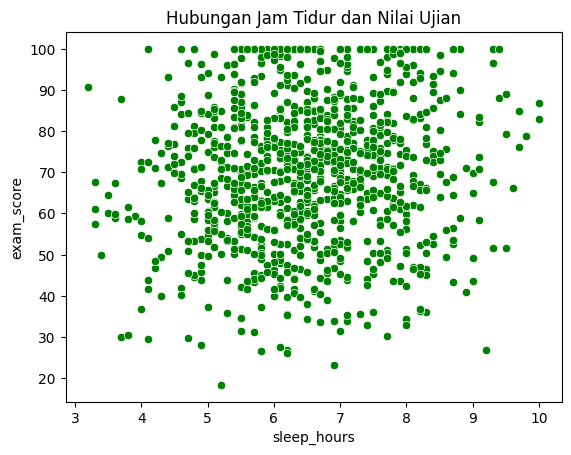

In [45]:
sns.scatterplot(data=df, x='sleep_hours', y='exam_score', color='green')
plt.title("Hubungan Jam Tidur dan Nilai Ujian")

Scatter plot di atas menunjukkan hubungan yang positif pada variabel durasi jam tidur dengan nilai ujian, namun plot tersebut tidak menunjukkan hubungan yang tidak begitu kuat ditandai dengan plot yang menyebar

### Scatter/Reg Plot – "Media Sosial" vs "Nilai Ujian"

Text(0.5, 1.0, 'Waktu Sosial Media dan Nilai Ujian')

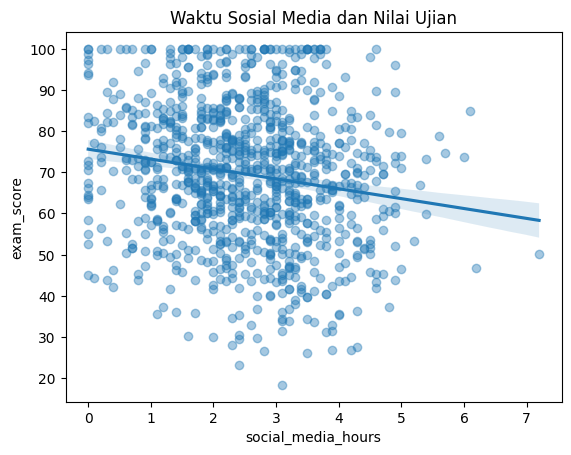

In [46]:
sns.regplot(data=df, x='social_media_hours', y='exam_score', scatter_kws={'alpha':0.4})
plt.title("Waktu Sosial Media dan Nilai Ujian")

Ada tren negatif antara waktu penggunaan media sosial dan nilai ujian. Namun, karena sebaran data cukup luas, kemungkinan faktor lain juga berpengaruh terhadap nilai ujian.

### Heatmap Korelasi

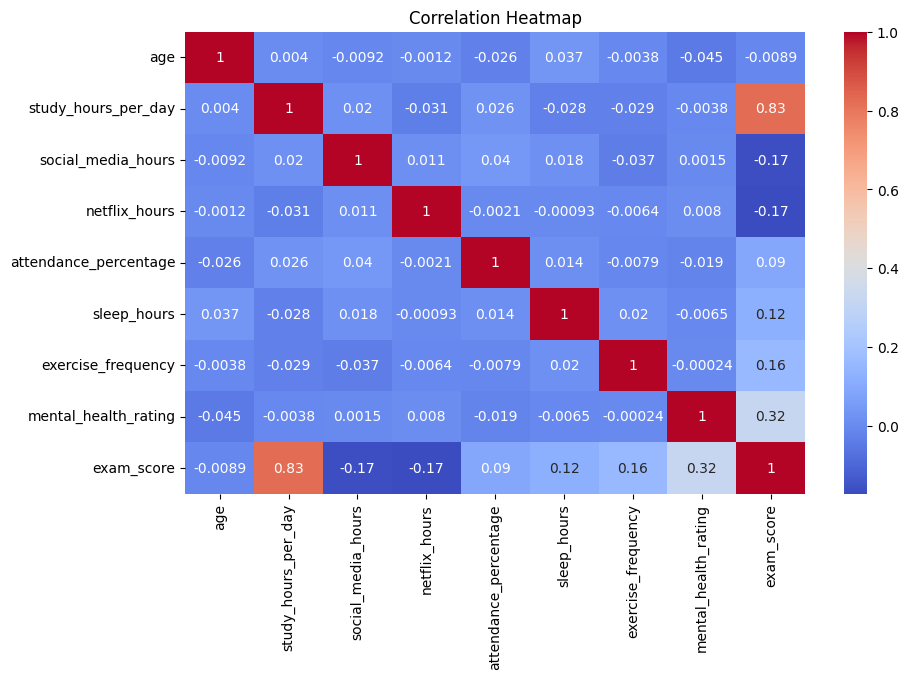

In [47]:
# Korelasi fitur untuk tipe numerik
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_features + [target]].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

dari heatmap korelasi di atas sudah terlihat jelas bahwa fitur study_hours_per_day berkorelasi kuat terhadap fitur exam_score. itu artinya semakin lama/banyak seorang siswa menghabiskan waktunya untuk belajar dalam sehari maka semakin tinggi pula nilai ujian yang diperolehnya.

### Pairplot

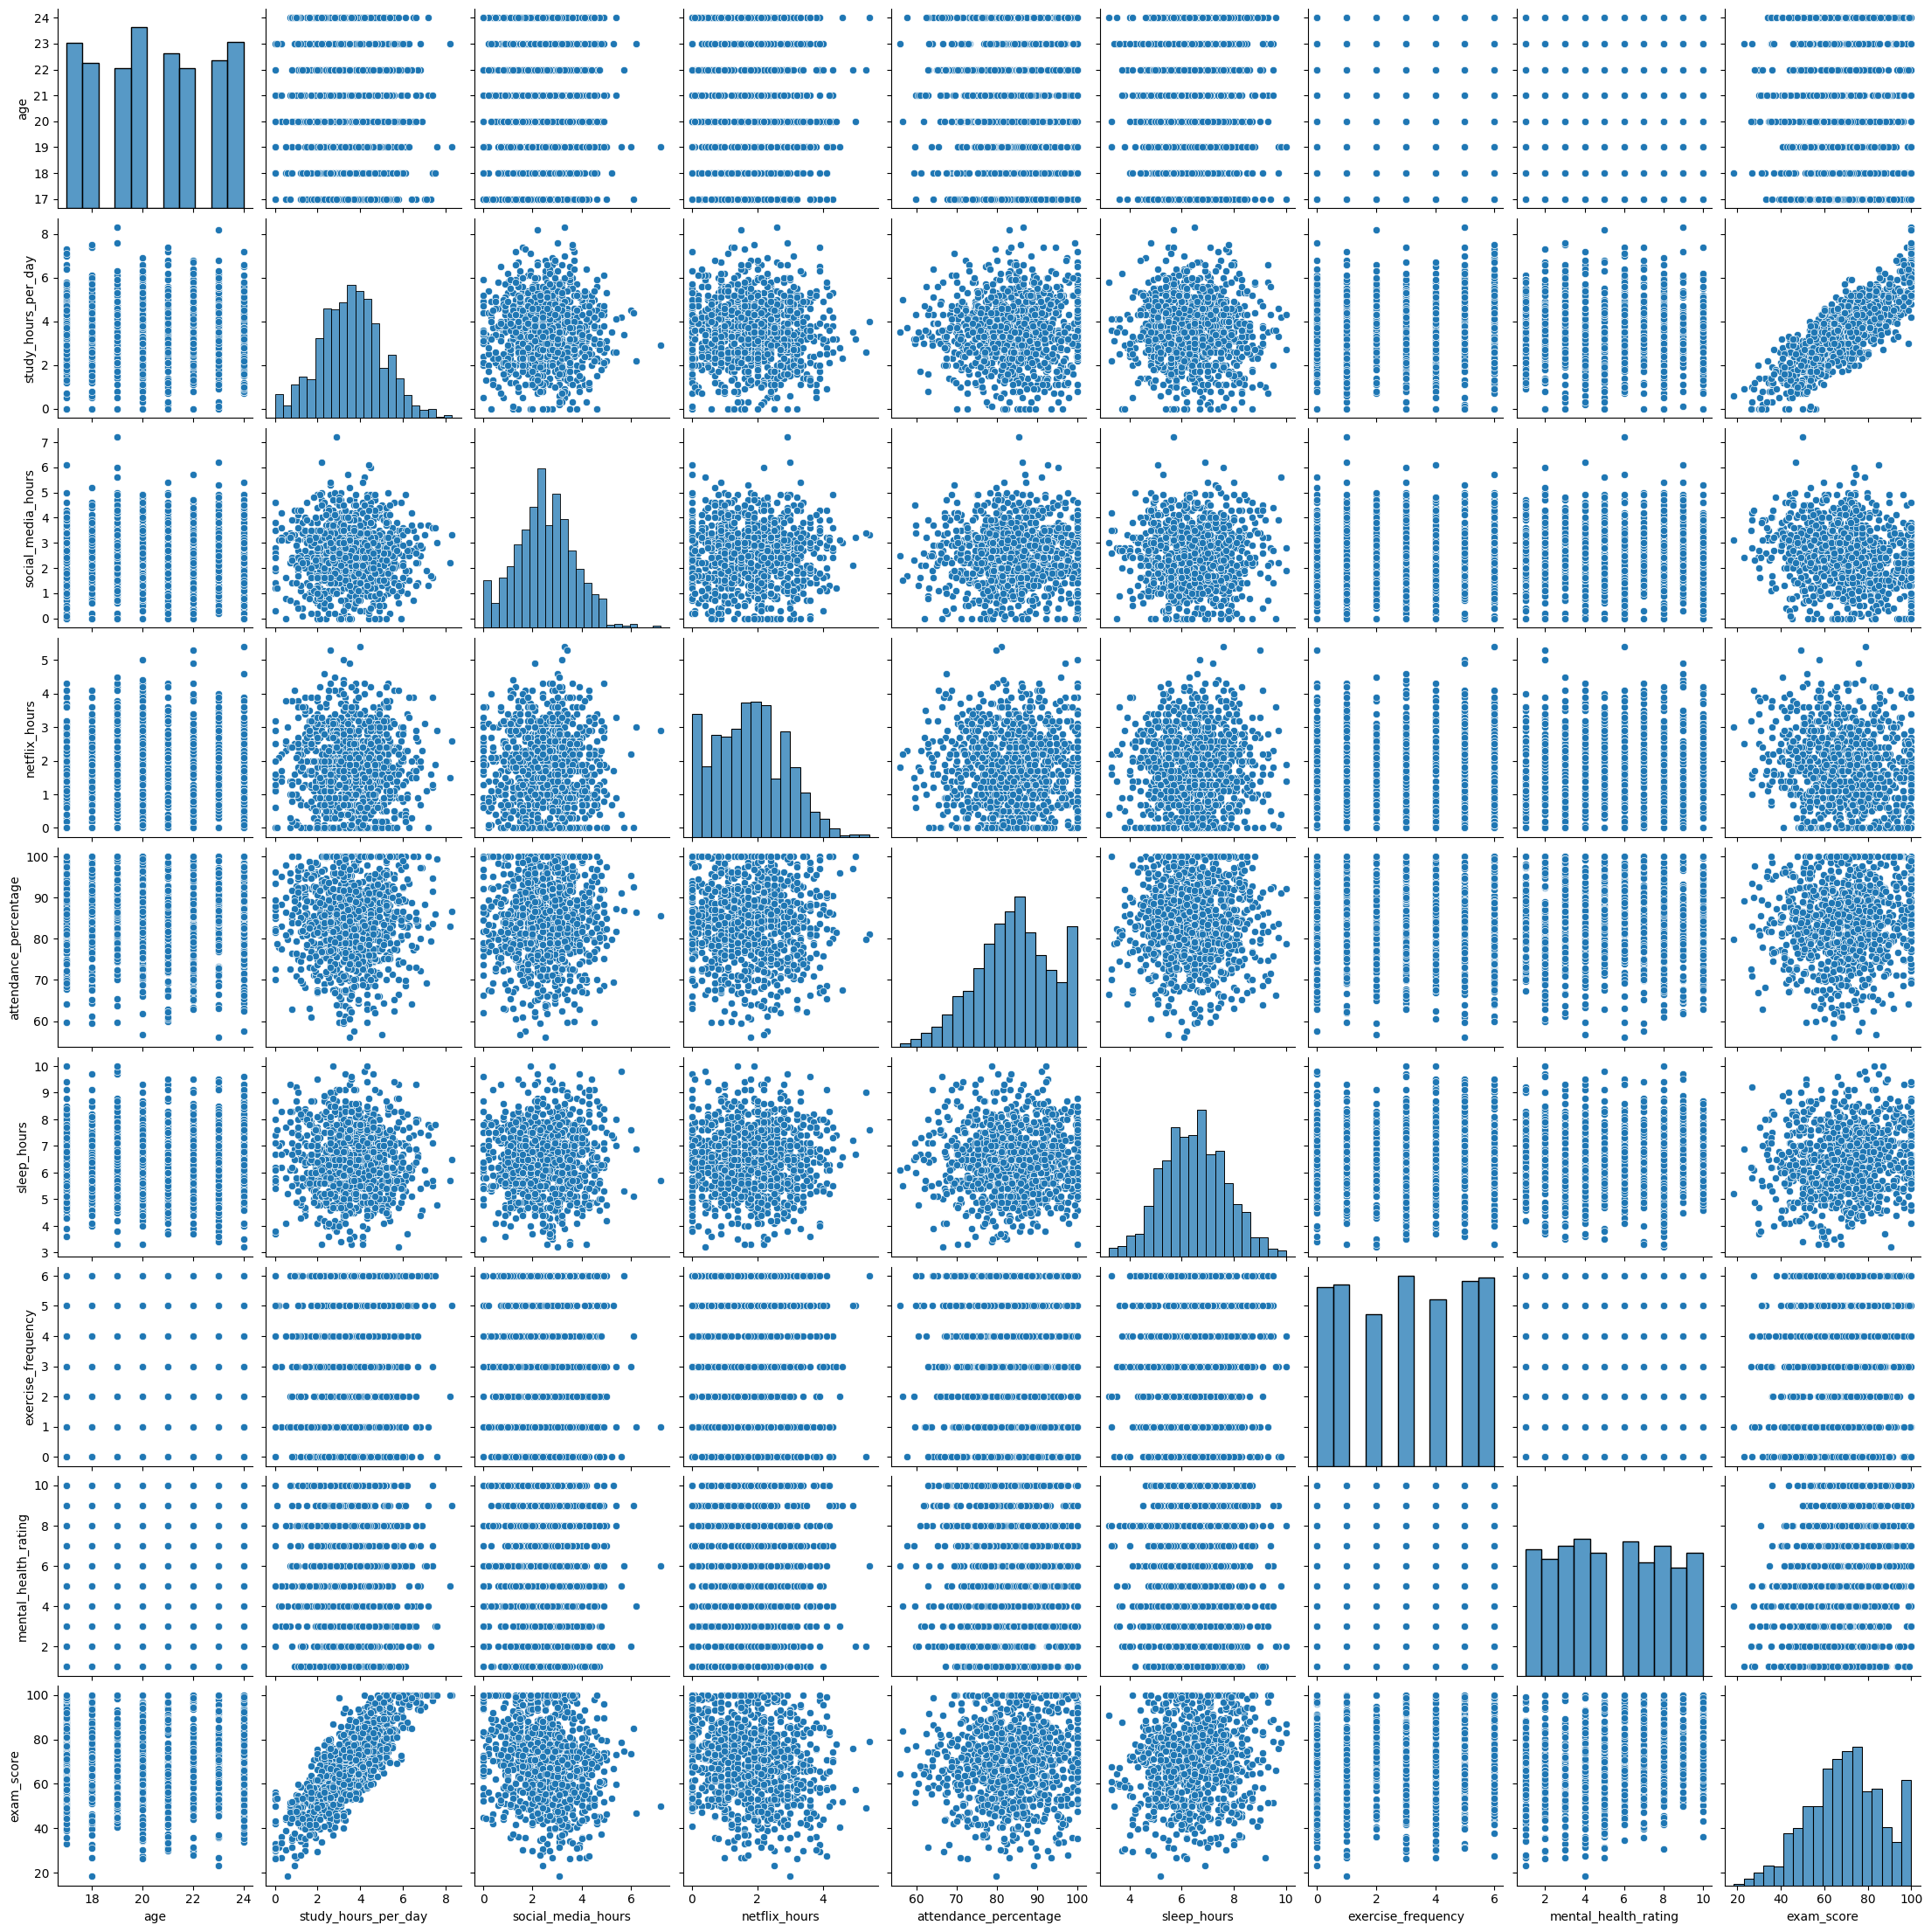

In [48]:
# membuat pairplot
sns.pairplot(df[numerical_features + [target]])
plt.show()

Dari pairplot di atas kita bisa lihat ada beberapa fitur yang berkorelasi positif yang ditandai dengan plot yang bergerak dari kiri bawah ke arah kanan atas, korelasi negatif ditandai dengan plot yang bergerak dari kiri atas ke kanan bawah, atau yang tidak berkorelasi sama sekali bisa ditandai dengan bentuk korelasi yang lurus atau menyebar

### Distribusi Data Kategorikal

<ipython-input-49-a6fab37defcb>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette=custom_palette)
<ipython-input-49-a6fab37defcb>:10: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.countplot(y=df[column], palette=custom_palette)
<ipython-input-49-a6fab37defcb>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette=custom_palette)
<ipython-input-49-a6fab37defcb>:10: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(y=df[column], palette=custom_palette)
<ipython-input-49-a6fab37defcb>:10: FutureWarning: 

Passing `palette` without assigni

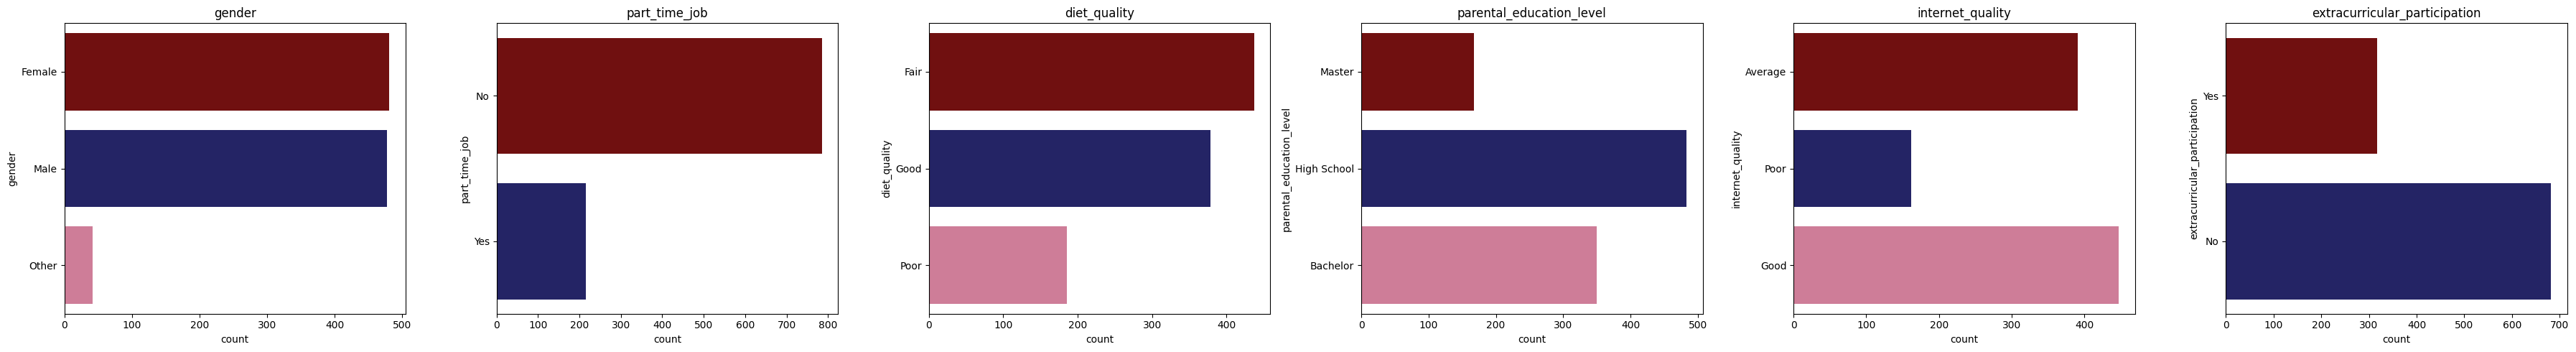

In [49]:
# distribusi data categorical
feature =  ['gender', 'part_time_job', 'diet_quality', 'parental_education_level',
            'internet_quality', 'extracurricular_participation']
custom_palette = ['maroon', 'midnightblue', 'palevioletred', 'darkcyan']
cat_cols = len(feature)
fig, ax = plt.subplots(nrows=1, ncols=cat_cols, figsize=(cat_cols * 6, 5))

for i, column in enumerate(df[feature].columns):
    plt.subplot(1, cat_cols, i + 1)
    sns.countplot(y=df[column], palette=custom_palette)
    ax[i].set_title(column)

plt.tight_layout()
plt.show()

### Menghitung Jumlah Data dari Setiap Fitur Kategorikal

In [50]:
# menghitung jumlah data dari setiap fitur kategorikal
cat_col = ['gender', 'part_time_job', 'diet_quality', 'parental_education_level',
            'internet_quality', 'extracurricular_participation']
cat_col_count = {}
for col in cat_col:
    cat_col_count[col] = df[col].value_counts()
    print(f"Jumlah data untuk fitur '{col}':")
    print(cat_col_count[col])
    print()

Jumlah data untuk fitur 'gender':
gender
Female    481
Male      477
Other      42
Name: count, dtype: int64

Jumlah data untuk fitur 'part_time_job':
part_time_job
No     785
Yes    215
Name: count, dtype: int64

Jumlah data untuk fitur 'diet_quality':
diet_quality
Fair    437
Good    378
Poor    185
Name: count, dtype: int64

Jumlah data untuk fitur 'parental_education_level':
parental_education_level
High School    483
Bachelor       350
Master         167
Name: count, dtype: int64

Jumlah data untuk fitur 'internet_quality':
internet_quality
Good       447
Average    391
Poor       162
Name: count, dtype: int64

Jumlah data untuk fitur 'extracurricular_participation':
extracurricular_participation
No     682
Yes    318
Name: count, dtype: int64



# Modeling & Hyperparameter Tuning

In [51]:
# Pipeline model XGBoost (Best Model)
xgb_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', XGBRegressor(objective='reg:squarederror', random_state=42))
])

# Hyperparameter tuning
param_grid = {
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.05, 0.1, 0.2],
    'model__max_depth': [3, 5, 7],
    'model__subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

print("XGBoost model training selesai.")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__n_estimators': 200, 'model__subsample': 0.8}
XGBoost model training selesai.


**Model 1: XGBoost (dengan hyperparameter tuning)**

* **Tahapan:**

1. **Pipeline** dibuat untuk menggabungkan preprocessing (`preprocessor`) dan pemodelan (`XGBRegressor`) dalam satu alur.
2. Melakukan **GridSearchCV** untuk mencari kombinasi hyperparameter terbaik berdasarkan skor evaluasi (`r2`) menggunakan 5-fold cross-validation.
3. Model terbaik dipilih berdasarkan hasil tuning dan dilatih kembali (`best_estimator_`).

* **Parameter yang dituning (`param_grid`)**:

  * `n_estimators`: Jumlah pohon (trees) dalam boosting. Lebih banyak = bisa menangkap kompleksitas lebih tinggi tapi rawan overfitting.      
  * `learning_rate`: Seberapa besar kontribusi tiap pohon dalam membentuk prediksi akhir. Kecil = lebih stabil, tapi perlu pohon lebih banyak.
  * `max_depth`: Kedalaman maksimal tiap pohon. Lebih dalam = bisa menangkap relasi non-linear yang kompleks, tapi juga rawan overfitting.
  * `subsample`: Proporsi sampel data yang digunakan untuk membangun tiap pohon. <1.0 = membantu regularisasi dan mencegah overfitting.    |

* **Tujuan dari tuning ini:**

Untuk mencari kombinasi parameter yang paling optimal dalam meningkatkan akurasi (dalam hal ini, skor R²) dan menghindari overfitting/underfitting.

In [52]:
# Pipeline model Linear Regression
lr_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', LinearRegression())
])

lr_model.fit(X_train, y_train)

print("Linear Regression model training selesai.")

Linear Regression model training selesai.


**Model 2: Linear Regression**

* **Tahapan:**

1. Membuat pipeline sederhana yang berisi `preprocessor` dan `LinearRegression()`.
2. Tidak dilakukan tuning hyperparameter karena model ini **hanya memiliki sedikit parameter yang bisa dituning** (seperti `fit_intercept`, `normalize`, dll, yang tidak terlalu signifikan untuk baseline).
3. Model langsung dilatih menggunakan `fit()` pada data training.

* **Parameter default:**

Linear Regression dari Scikit-learn menggunakan default parameter sebagai berikut:

* `fit_intercept=True`: model akan menghitung intercept (bias).
* `normalize=False`: input tidak dinormalisasi secara otomatis (karena kita sudah preprocessing sebelumnya).
* `n_jobs=None`: tidak melakukan paralelisasi saat fitting.


### **Pemilihan Model Terbaik**

#### **Model Terbaik: Linear Regression**

**Alasan Pemilihan:**

1. **Akurasi Lebih Tinggi (R² Score)**
   Linear Regression menghasilkan **R² Score sebesar 0.896**, lebih tinggi dibanding XGBoost (0.880). Ini berarti Linear Regression mampu menjelaskan **sekitar 89,6% variansi nilai ujian akhir** berdasarkan fitur gaya hidup siswa.

2. **Kesalahan Lebih Kecil (MAE & RMSE)**

   * **MAE (Mean Absolute Error):** Linear Regression = **4.19**, lebih kecil dari XGBoost = 4.55. Artinya, rata-rata kesalahan prediksi Linear Regression lebih rendah.
   * **RMSE (Root Mean Squared Error):** Linear Regression = **5.15**, juga lebih baik dari XGBoost = 5.54. Ini penting terutama jika kamu ingin meminimalkan kesalahan besar.

3. **Model yang Lebih Sederhana & Interpretable**
   Linear Regression sangat **mudah dijelaskan** ke stakeholder non-teknis dan cocok untuk kasus edukasi seperti ini, di mana penting untuk mengetahui **hubungan linier antar variabel** seperti durasi belajar, tidur, dan nilai ujian.

4. **Generalisasi Lebih Baik pada Data Ini**
   Dalam konteks dataset ini yang bersifat **simulasi dan linier**, Linear Regression terbukti memberikan performa optimal **tanpa perlu kompleksitas tambahan** seperti yang dimiliki XGBoost.

*Kesimpulan:*

> **Linear Regression dipilih sebagai model terbaik** dalam proyek ini karena menghasilkan **metrik evaluasi terbaik secara konsisten** (MAE, RMSE, dan R²), memiliki **kompleksitas rendah**, serta **mudah dijelaskan**. Model ini ideal untuk mendukung analisis hubungan gaya hidup siswa dengan kinerja akademik secara transparan dan efisien.

* Bar Plot – Feature Importance dari Model (jika pakai XGBoost/Tree-based)

Text(0.5, 1.0, 'Top 10 Fitur Penting Menurut XGBoost')

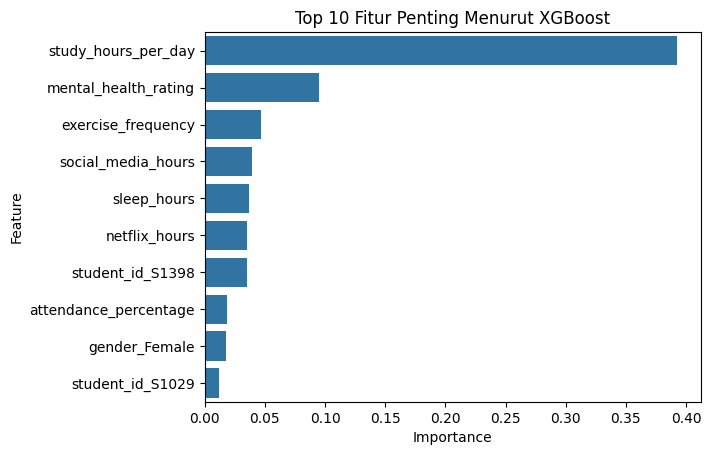

In [53]:
importances = best_model.named_steps['model'].feature_importances_
# The rest of your code for feature names and plotting remains the same
feature_names = best_model.named_steps['preprocess'].transformers_[0][2] + \
                list(best_model.named_steps['preprocess'].transformers_[1][1].get_feature_names_out())
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

sns.barplot(data=importance_df.head(10), x='Importance', y='Feature')
plt.title("Top 10 Fitur Penting Menurut XGBoost")

# Evaluasi Model

In [54]:
# Fungsi evaluasi model regresi
def evaluate_regression_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return mae, rmse, r2

# Evaluasi Linear Regression
lr_mae, lr_rmse, lr_r2 = evaluate_regression_model(lr_model, X_test, y_test)

# Evaluasi XGBoost
xgb_mae, xgb_rmse, xgb_r2 = evaluate_regression_model(best_model, X_test, y_test)

# Buat DataFrame ringkasan
summary_df = pd.DataFrame({
    'Model': ['Linear Regression', 'XGBoost'],
    'MAE': [lr_mae, xgb_mae],
    'RMSE': [lr_rmse, xgb_rmse],
    'R² Score': [lr_r2, xgb_r2]
})

# Tampilkan hasil
print("Ringkasan Evaluasi Model Regresi:")
summary_df

Ringkasan Evaluasi Model Regresi:


,Model,MAE,RMSE,R² Score
0,Linear Regression,4.192597,5.152099,0.896486
1,XGBoost,4.547265,5.536295,0.880472


**1. Penjelasan Hasil Proyek Berdasarkan Metrik Evaluasi**

Dalam proyek ini, aku membandingkan dua model regresi: Linear Regression dan XGBoost untuk memprediksi nilai ujian akhir siswa berdasarkan gaya hidup mereka (seperti durasi belajar, tidur, penggunaan sosial media, dsb).

Dari ringkasan metrik di atas, dapat disimpulkan bahwa:

* Linear Regression memiliki performa lebih baik dibanding XGBoost karena menghasilkan MAE dan RMSE yang lebih rendah, serta R² Score yang lebih tinggi.
Artinya, Linear Regression lebih akurat dalam memprediksi nilai ujian akhir, dan lebih efisien dalam meminimalkan kesalahan prediksi.

**2. Kesesuaian Metrik Evaluasi dengan Konteks Proyek**

* Dalam konteks Data & Problem Statement:
  - Tujuan dari proyek ini adalah memodelkan dan memprediksi nilai akhir siswa berdasarkan faktor gaya hidup.
  - Karena ini adalah masalah regresi, maka kita tidak menggunakan metrik klasifikasi seperti accuracy atau F1-score.
  - Fokus utama adalah seberapa dekat prediksi model dengan nilai aktual.

* Solusi yang Diinginkan:
  - Model dengan kemampuan prediksi yang stabil dan akurat.
  - Metrik yang menggambarkan seberapa besar kesalahan prediksi dan seberapa banyak variansi yang dijelaskan oleh model.

* Metrik yang Digunakan Sesuai Karena:
  - MAE & RMSE memberi tahu seberapa besar rata-rata kesalahan dalam satuan nilai ujian.
  - R² Score menunjukkan seberapa besar bagian dari variansi nilai ujian akhir yang bisa dijelaskan oleh fitur-fitur gaya hidup.

**Kesimpulan Akhir:**
Berdasarkan hasil evaluasi dengan MAE, RMSE, dan R² Score, model Linear Regression dipilih sebagai model terbaik. Metrik yang digunakan sesuai dengan konteks regresi dan mendukung interpretasi performa model secara menyeluruh. Ketiga metrik ini bekerja secara saling melengkapi untuk memberikan gambaran seberapa akurat dan stabil model dalam memprediksi nilai akademik siswa.